In [13]:
import pandas as pd
data_path = r"C:\Users\ferijoni\OneDrive - FERI AG\Dokumente\6.Sem\BD\fs-classify-products\data\ClassifyProducts.csv"
data_ori = pd.read_csv(data_path)

Data Exploration

In [14]:
print(data_ori.shape)
# types
print(data_ori.dtypes)
# feature names
print(list(data_ori))
# head
print(data_ori.head(6))

(61878, 95)
id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object
['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69', 'feat_7

In [15]:
zero_counts = (data_ori == 0).sum()
top_5_zero_columns = zero_counts.sort_values(ascending=False).head(5)
print(top_5_zero_columns)

feat_6     60710
feat_84    60455
feat_51    60159
feat_5     58907
feat_81    58695
dtype: int64


In [16]:
print((data_ori.isnull().sum()).sum())

0


In [17]:
data_ori.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
...,...,...,...,...,...,...,...,...
feat_89,61878.0,0.457772,1.527385,0.0,0.00,0.0,0.00,61.0
feat_90,61878.0,0.812421,4.597804,0.0,0.00,0.0,0.00,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.00,0.0,0.00,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.00,0.0,0.00,19.0


<Axes: xlabel='target', ylabel='count'>

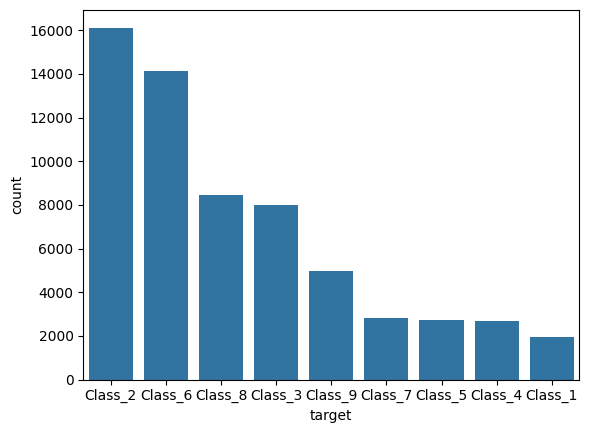

In [18]:
import seaborn as sns
sns.countplot(x="target", data=data_ori, order=data_ori["target"].value_counts().index)

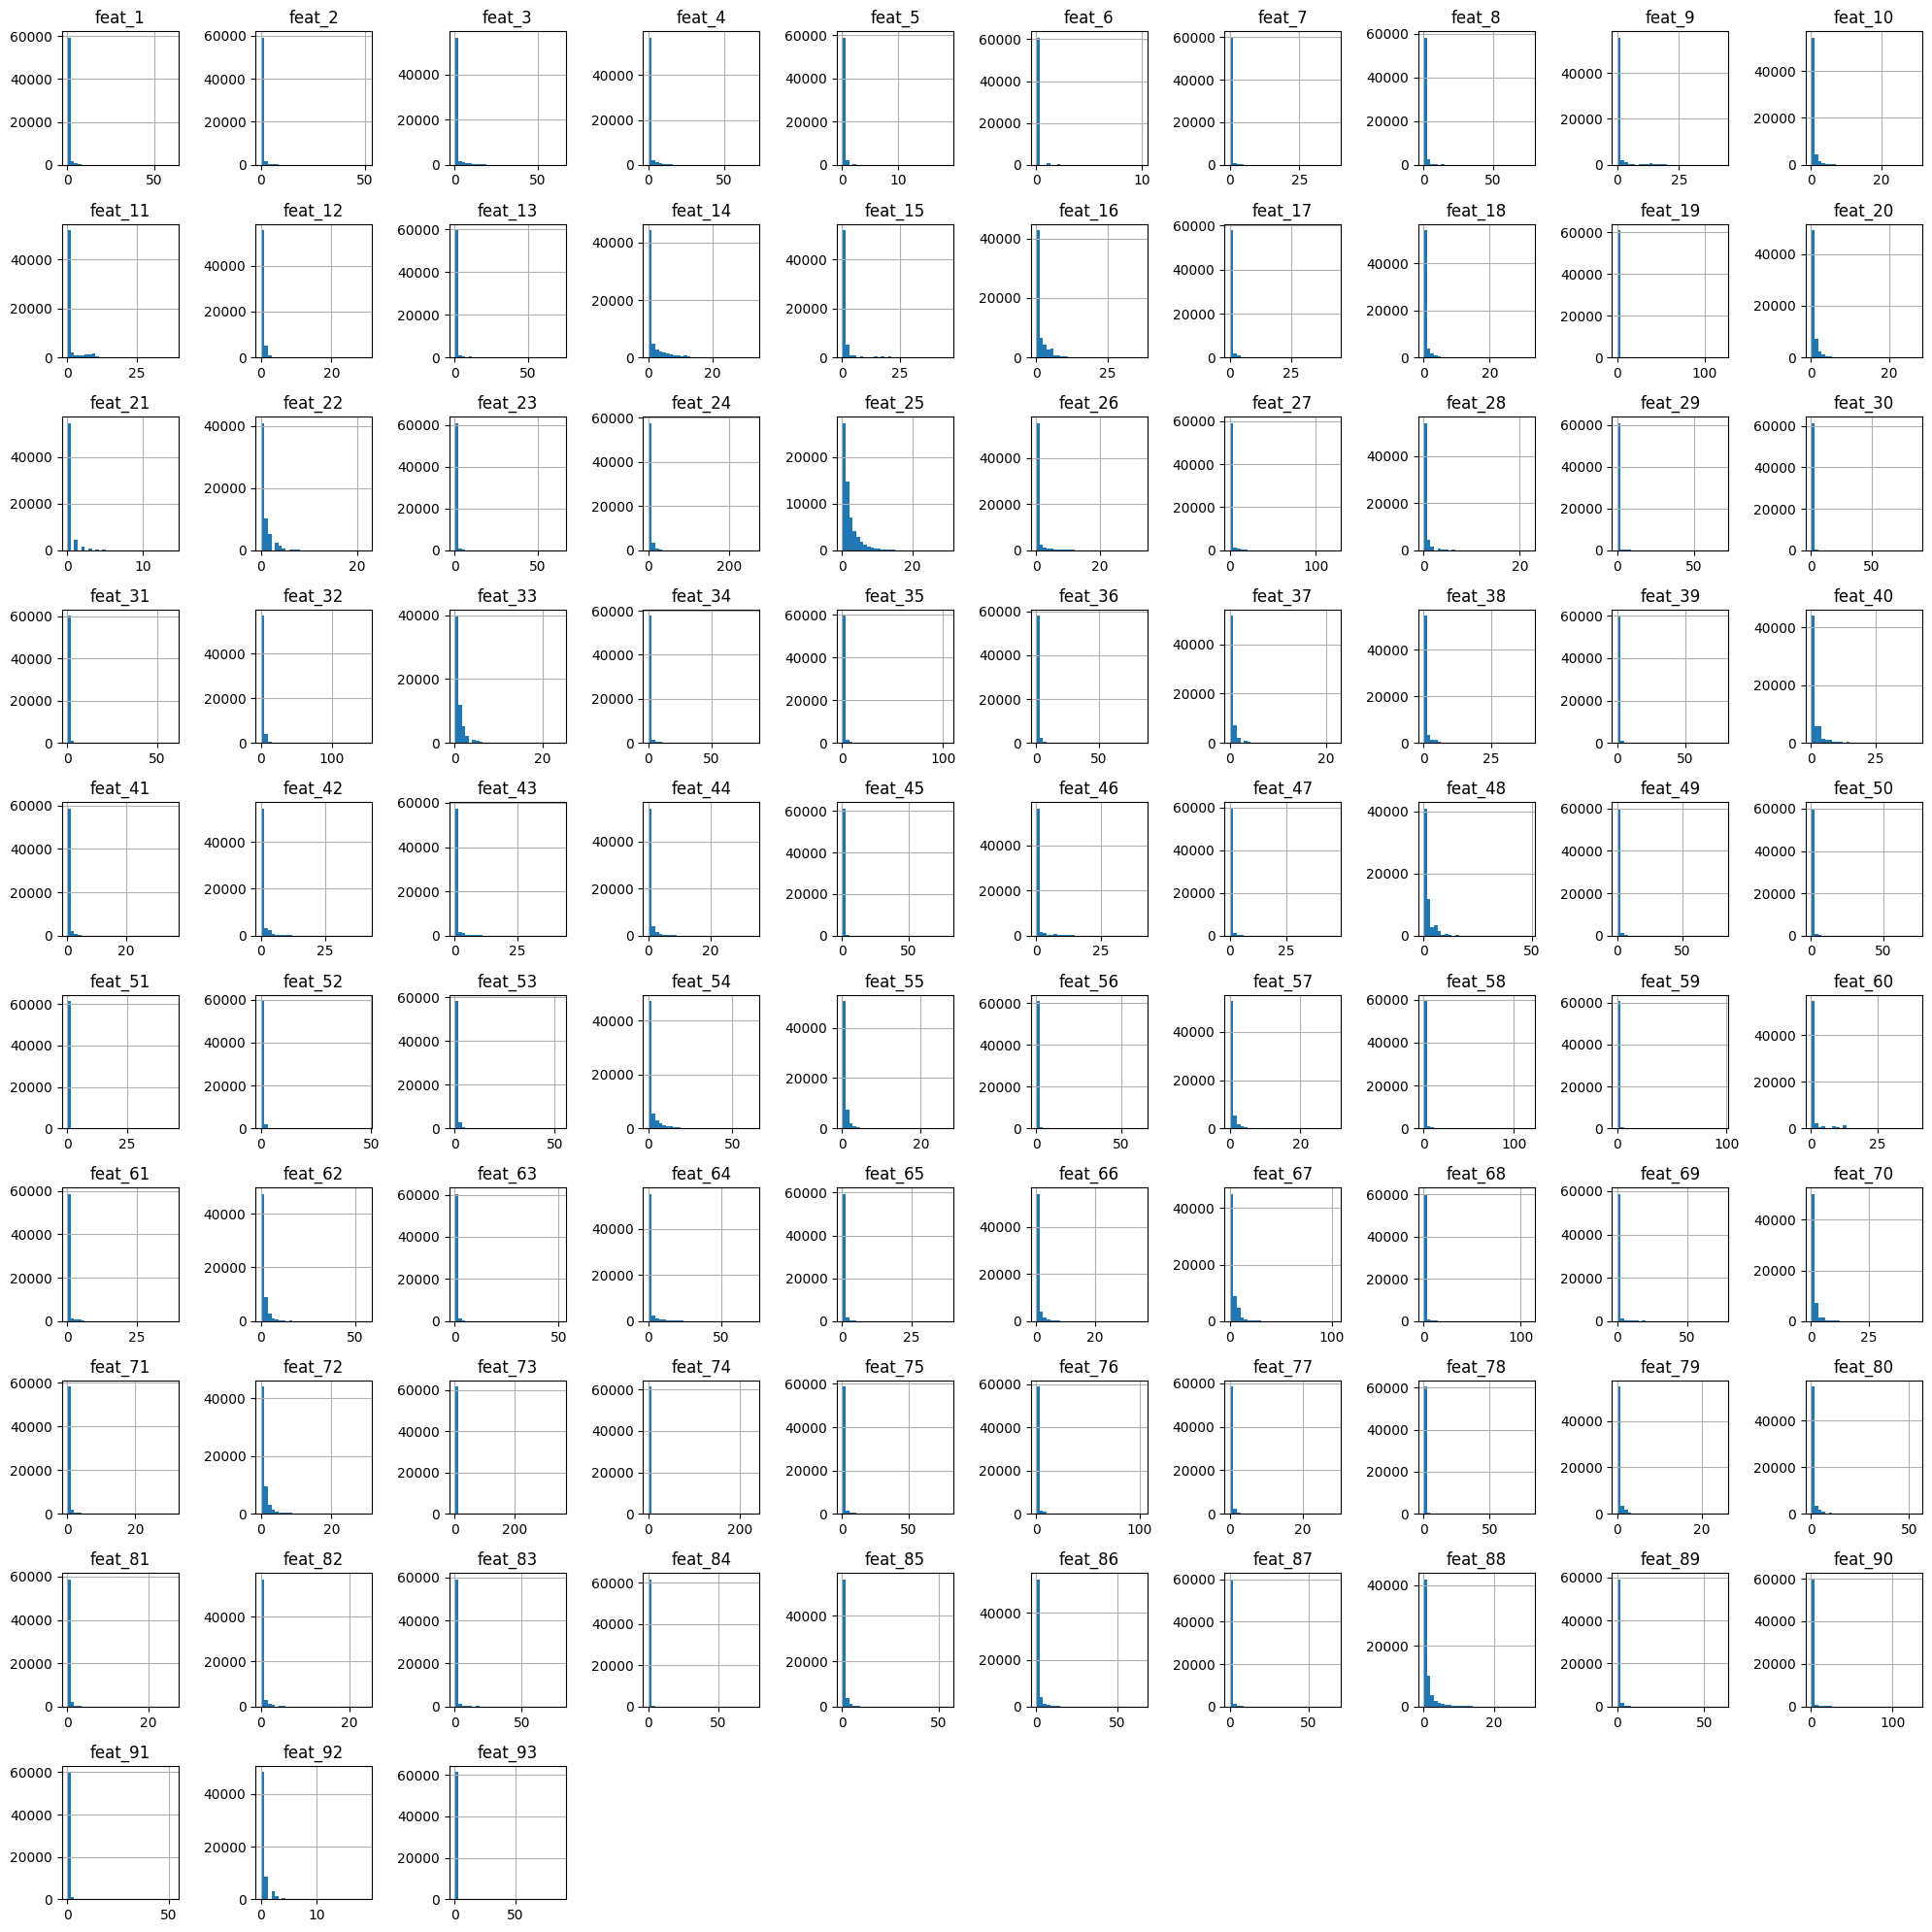

In [19]:
import matplotlib.pyplot as plt
data_excluded = data_ori.iloc[:, 1:-1]
data_excluded.hist(bins=30, figsize=(20, 20))
plt.tight_layout()
plt.show()

     Feature_1 Feature_2  Correlation
225     feat_3   feat_46     0.777517
762     feat_9   feat_64     0.702951
1253   feat_15   feat_72     0.764664
2315   feat_30   feat_84     0.716862
2798   feat_39   feat_45     0.824146


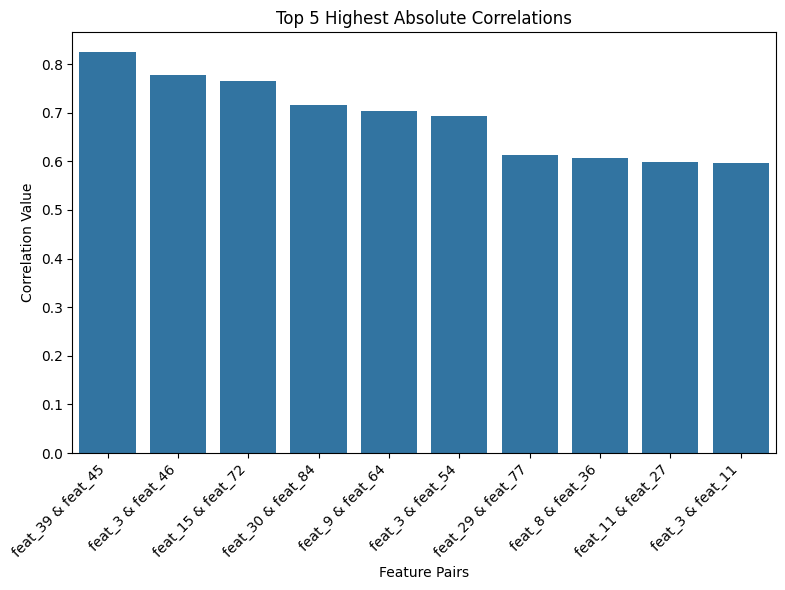

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix berechnen
corr = data_excluded.corr()

# Nur obere Dreiecksmatrix ohne Diagonale (sonst sind 1.0 enthalten)
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))

# In lange Form bringen und sortieren
corr_melted = corr_triu.stack().reset_index()
corr_melted.columns = ['Feature_1', 'Feature_2', 'Correlation']
top5_corr = corr_melted.reindex(corr_melted['Correlation'].abs().sort_values(ascending=False).index).head(10)

# Feature-Paare mit Korrelation über 70% speichern
high_corr_pairs = corr_melted[corr_melted['Correlation'].abs() > 0.7]
high_corr_pairs.to_csv('high_corr_feature_pairs.csv', index=False)

print(high_corr_pairs)
# Create a vertical barplot in English
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top5_corr,
    x=top5_corr['Feature_1'] + ' & ' + top5_corr['Feature_2'],
    y='Correlation'
)
plt.title("Top 5 Highest Absolute Correlations")
plt.xlabel("Feature Pairs")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

